A B2W Digital, um dos mais importantes e-commerce da América Latina, lançou o B2W-Reviews01 , um corpus aberto de análises de produtos com mais de 130.000 análises de usuários. Este conjunto de dados tem dois recursos de destino: o rótulo binário "recomendar a um amigo" e uma avaliação do usuário de 1 a 5 estrelas. Aqui, consideramos apenas a taxa do usuário. Descrição do autor do dataset criado para análise de sentimentos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive #conectando google drive para usar o dataset
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Machine_Learning_Dellead/Datasets/b2w.csv') #lendo o csv do google drive
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.tail()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
132368,41993,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,smarthphone perfeito muito bom e a econo...,"['smarthphone', 'perfeito', 'muito', 'bom', 'e...",1.0,5,10,10
132369,97639,Eu estou muito chateado com isso gostaria que ...,eu estou muito chateado com isso gostaria que ...,"['eu', 'estou', 'muito', 'chateado', 'com', 'i...",0.0,1,10,10
132370,95939,"Vale a pena pelo preço oferecido, qualidade a ...","vale a pena pelo preco oferecido, qualidade a ...","['vale', 'pena', 'pelo', 'preco', 'oferecido',...",NaN,3,-1,10
132371,117952,O produto anunciado no site dizia ser 100% al...,o produto anunciado no site dizia ser 100% al...,"['produto', 'anunciado', 'no', 'site', 'dizia'...",0.0,1,10,10
132372,43567,Não recebi o produto e consta como entregue no...,nao recebi o produto e consta como entregue no...,"['nao', 'recebi', 'produto', 'consta', 'como',...",0.0,1,10,10


In [ ]:
df.dtypes

original_index             int64
review_text               object
review_text_processed     object
review_text_tokenized     object
polarity                 float64
rating                     int64
kfold_polarity             int64
kfold_rating               int64
dtype: object

In [ ]:
df.columns

Index(['original_index', 'review_text', 'review_text_processed',
       'review_text_tokenized', 'polarity', 'rating', 'kfold_polarity',
       'kfold_rating'],
      dtype='object')

In [ ]:
df["polarity"]

0         1.0
1         1.0
2         0.0
3         1.0
4         NaN
         ... 
132368    1.0
132369    0.0
132370    NaN
132371    0.0
132372    0.0
Name: polarity, Length: 132373, dtype: float64

In [ ]:
df.describe()

,original_index,polarity,rating,kfold_polarity,kfold_rating
count,132373.000000,116058.000000,132373.000000,132373.000000,132373.000000
mean,66186.000000,0.691895,3.492004,4.698813,5.499921
std,38212.937929,0.461712,1.530289,3.434905,2.872311
min,0.000000,0.000000,1.000000,-1.000000,1.000000
25%,33093.000000,0.000000,2.000000,2.000000,3.000000
50%,66186.000000,1.000000,4.000000,5.000000,5.000000
75%,99279.000000,1.000000,5.000000,8.000000,8.000000
max,132372.000000,1.000000,5.000000,10.000000,10.000000


In [ ]:
df.sort_values(by="rating") #ordenando 

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
132372,43567,Não recebi o produto e consta como entregue no...,nao recebi o produto e consta como entregue no...,"['nao', 'recebi', 'produto', 'consta', 'como',...",0.0,1,10,10
98840,114986,"Bateria de mau qualidade, já mandei mensagem p...","bateria de mau qualidade, ja mandei mensagem p...","['bateria', 'de', 'mau', 'qualidade', 'ja', 'm...",0.0,1,8,8
98837,56843,Não recebi meu produto e não recebo nenhuma ex...,nao recebi meu produto e nao recebo nenhuma ex...,"['nao', 'recebi', 'meu', 'produto', 'nao', 're...",0.0,1,8,8
98833,56305,"Já mandei minha avaliação várias outras vezes,...","ja mandei minha avaliacao varias outras vezes,...","['ja', 'mandei', 'minha', 'avaliacao', 'varias...",0.0,1,8,8
98832,97682,Boa noite! Aberto um atendimento para o pedid...,boa noite! aberto um atendimento para o pedid...,"['boa', 'noite', 'aberto', 'um', 'atendimento'...",0.0,1,8,8
...,...,...,...,...,...,...,...,...
41978,78327,O cartão serviu muito bem para o que se destin...,o cartao serviu muito bem para o que se destin...,"['cartao', 'serviu', 'muito', 'bem', 'para', '...",1.0,5,4,4
92538,3446,Graças a Americanas fiz uma excelente aquisiçã...,gracas a americanas fiz uma excelente aquisica...,"['gracas', 'americanas', 'fiz', 'uma', 'excele...",1.0,5,7,7
92540,96842,Muito top o produto recomendo fácil configurar...,muito top o produto recomendo facil configurar...,"['muito', 'top', 'produto', 'recomendo', 'faci...",1.0,5,7,7
41973,95056,Excelente custo/benefício. Estou quebrando par...,excelente custo/beneficio. estou quebrando par...,"['excelente', 'custo', 'beneficio', 'estou', '...",1.0,5,4,4


In [ ]:
df

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1
...,...,...,...,...,...,...,...,...
132368,41993,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,smarthphone perfeito muito bom e a econo...,"['smarthphone', 'perfeito', 'muito', 'bom', 'e...",1.0,5,10,10
132369,97639,Eu estou muito chateado com isso gostaria que ...,eu estou muito chateado com isso gostaria que ...,"['eu', 'estou', 'muito', 'chateado', 'com', 'i...",0.0,1,10,10
132370,95939,"Vale a pena pelo preço oferecido, qualidade a ...","vale a pena pelo preco oferecido, qualidade a ...","['vale', 'pena', 'pelo', 'preco', 'oferecido',...",NaN,3,-1,10
132371,117952,O produto anunciado no site dizia ser 100% al...,o produto anunciado no site dizia ser 100% al...,"['produto', 'anunciado', 'no', 'site', 'dizia'...",0.0,1,10,10


In [ ]:
df.loc[3] #selecionar linhas pelo índice


original_index                                                       17114
review_text              Bom custo beneficio. Adequado para pessoas que...
review_text_processed    bom custo beneficio. adequado para pessoas que...
review_text_tokenized    ['bom', 'custo', 'beneficio', 'adequado', 'par...
polarity                                                                 1
rating                                                                   5
kfold_polarity                                                           1
kfold_rating                                                             1
Name: 3, dtype: object

In [ ]:
df[df["rating"] > 3] #Para selecionar de acordo com critérios condicionais, se usa o que se chama de Boolean Indexing.

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
5,129809,"ótmo produto atendeu as expectativas, a entreg...","otmo produto atendeu as expectativas, a entreg...","['otmo', 'produto', 'atendeu', 'as', 'expectat...",1.0,4,1,1
6,111303,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...","gostei muito do produto! tem otima qualidade, ...","['gostei', 'muito', 'do', 'produto', 'tem', 'o...",1.0,4,1,1
...,...,...,...,...,...,...,...,...
132362,80186,toalhas do ótima qualidade e macias. Atendeu p...,toalhas do otima qualidade e macias. atendeu p...,"['toalhas', 'do', 'otima', 'qualidade', 'macia...",1.0,4,10,10
132363,52620,O TELEVISOR É LINDO E UMA QUALIDADE DE IMAGEM ...,o televisor e lindo e uma qualidade de imagem ...,"['televisor', 'lindo', 'uma', 'qualidade', 'de...",1.0,5,10,10
132364,48600,"Tudo de bom, produto de primeira linha, goste...","tudo de bom, produto de primeira linha, goste...","['tudo', 'de', 'bom', 'produto', 'de', 'primei...",1.0,5,10,10
132367,122579,"Ótimo jogo, um dos melhores que joguei. Entreg...","otimo jogo, um dos melhores que joguei. entreg...","['otimo', 'jogo', 'um', 'dos', 'melhores', 'qu...",1.0,5,10,10


In [ ]:
df[(df['rating'] > 3) | (df['kfold_rating'] == 10)]


,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
5,129809,"ótmo produto atendeu as expectativas, a entreg...","otmo produto atendeu as expectativas, a entreg...","['otmo', 'produto', 'atendeu', 'as', 'expectat...",1.0,4,1,1
6,111303,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...","gostei muito do produto! tem otima qualidade, ...","['gostei', 'muito', 'do', 'produto', 'tem', 'o...",1.0,4,1,1
...,...,...,...,...,...,...,...,...
132368,41993,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,smarthphone perfeito muito bom e a econo...,"['smarthphone', 'perfeito', 'muito', 'bom', 'e...",1.0,5,10,10
132369,97639,Eu estou muito chateado com isso gostaria que ...,eu estou muito chateado com isso gostaria que ...,"['eu', 'estou', 'muito', 'chateado', 'com', 'i...",0.0,1,10,10
132370,95939,"Vale a pena pelo preço oferecido, qualidade a ...","vale a pena pelo preco oferecido, qualidade a ...","['vale', 'pena', 'pelo', 'preco', 'oferecido',...",NaN,3,-1,10
132371,117952,O produto anunciado no site dizia ser 100% al...,o produto anunciado no site dizia ser 100% al...,"['produto', 'anunciado', 'no', 'site', 'dizia'...",0.0,1,10,10


In [ ]:
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [ ]:
df.select_dtypes(include='number').head(20)  #selecionando somente colunas com números

,original_index,polarity,rating,kfold_polarity,kfold_rating
0,11955,1.0,4,1,1
1,35478,1.0,5,1,1
2,122760,0.0,1,1,1
3,17114,1.0,5,1,1
4,19112,NaN,3,-1,1
5,129809,1.0,4,1,1
6,111303,1.0,4,1,1
7,54255,1.0,5,1,1
8,5024,1.0,5,1,1
9,84115,1.0,4,1,1


In [ ]:
df["rating"].unique() #retornando valores únicos da coluna

array([4, 5, 1, 3, 2])

In [ ]:
df["review_text"].unique()  #retornando valores únicos da coluna

array(['Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar',
       'Produto excepcional!  recomendo!!! inovador e gostoso de ler!!',
       'recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto',
       ...,
       'Eu estou muito chateado com isso gostaria que vcs resolve-se rápido pq já estou pagando uma coisa sem usar. Amanhã eu vou falar com meu advogado pra resolver o mas rápido possível. E tem mais eu já ia fazer outra compra mas desse jeito não dar. Estou aguardando meu produto o mas rápido q vcs poder. O mas obrigado',
       'Vale a pena pelo preço oferecido, qualidade a altura pelo produto ofertado',
       'Não recebi o produto e consta como entregue no site, ja reclamei 3 vezes e a unica resposta que tive foi de que iriam averiguar... =/'],
      dtype=object)

In [ ]:
df["review_text"].value_counts()     #contando valores

Entrega super rápida .   Parabéns pela agilidade na entrega e qualidade no produto .                                                                                                                                                                                                                                                                                                                                                                                                                                                                             57
Parabéns pela agilidade na entrega e qualidade no produto .                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
df["review_text"].value_counts(normalize=True) #verificando em percentuais os valores da operação anterior

Entrega super rápida .   Parabéns pela agilidade na entrega e qualidade no produto .                                                                                                                                                                                                                                                                                                                                                                                                                                                                             0.000431
Parabéns pela agilidade na entrega e qualidade no produto .                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
#agrupando dados e em seguida a média usando o método .mean()

df.groupby("review_text").mean()

,original_index,polarity,rating,kfold_polarity,kfold_rating
review_text,,,,,
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1,84717.0,1.0,5.00,1.000000,1.000000
!!!!!!!!!!!!!!!!Primeira Bicicleta !!!!!!!!!!!!!!!!!!!!!!!!,14126.0,NaN,3.00,-1.000000,6.000000
""" e so VESTIR E SAIR VOANDO POR AI DEFENDENDO SUA CIDADE! FORA O KAMERAMERA que ela solta, so precisa de treinos pra conseguir se equilibrar no espaço! e o oxigênio deveria durar mais! Não precisa de carteira para poder voar nessa linda roupa! top top top so pegar e sair matando vagabundo por ai! "" - -*",7841.0,0.0,2.00,7.000000,7.000000
""":o) (o:"" Quero muito um celular desse para mim. Minha irmã comprou um desse pra ela e está adorando...",15880.0,1.0,5.00,4.000000,4.000000
"""A oração não é questão de falar com Deus, mas antes, de escutá-lo ou de estar unido a Ele."" (pag 22). É uma ótima opção para a meditação cristã.",57287.0,1.0,4.00,4.000000,4.000000
...,...,...,...,...,...
• Dentro do prazo de entrega; • Preço bom; •Produto veio muito próximo à data de vencimento;,129869.0,1.0,4.00,10.000000,10.000000
"♡ Apaixonada nesse celular!!! Excelente a câmera, bateria, etc...",97347.0,1.0,5.00,8.000000,8.000000
ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ,128314.0,1.0,4.75,7.750000,7.750000


In [ ]:
df.groupby("review_text").mean()["rating"].sort_values() #agrupando por coluna, exibindo a média e organizando em ordem crescenteos valores

review_text
Não tiveram cuidado na hora do armazenamento nas caixas para transporte, não colocaram nada para proteger...                                                                                                                          1.0
O filme era pra ser 3d né? Errado! A unica coisa que o filme mostra em 3D é o menu, fora isso mais nada! uso uma tv 4k 3d de 55' e um blu-ray 3d da Samsung. Foi uma péssima compra, nunca me arrependi tanto.                        1.0
Uma m^e...  esse produto principalmente a loja americana pois não recebi e um grande descanso dessa empresa em resolver a questão comunicação zero. Só mandar email eletrônico e nada de solução.                                     1.0
Uma panela veio amassada, e uma frigideira com dois furos, como se tivessem furado  pra por o cabo, mas furaram de novo e colocaram o cabo nos outros furos. Ja fiz um SAC para Tramontina.                                           1.0
É a segunda vez que estão pedindo que avalie um prod

In [ ]:
def fatiar(review_text): #retornando somente as 3 primeiras letras da palavra inicial
  return review_text[:3]

df["review_text"].apply(fatiar)


0         Bem
1         Pro
2         rec
3         Bom
4         Alé
         ... 
132368    SMA
132369    Eu 
132370    Val
132371    O p
132372    Não
Name: review_text, Length: 132373, dtype: object

In [ ]:
df["review_text"].apply(lambda x: x[:3]) #pega as 3 primeiras letras daa palvra que inica a frase(neste caso))

0         Bem
1         Pro
2         rec
3         Bom
4         Alé
         ... 
132368    SMA
132369    Eu 
132370    Val
132371    O p
132372    Não
Name: review_text, Length: 132373, dtype: object

In [ ]:
df2 = df.head(20)
df2 = df2.replace({"kfold_polarity":{ 1.000000:np.nan}}) #substituindo o valor "1.000000" na coluna "kfold_polarity" por um NaN
df2

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,NaN,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,NaN,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,NaN,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,NaN,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1.0,1
5,129809,"ótmo produto atendeu as expectativas, a entreg...","otmo produto atendeu as expectativas, a entreg...","['otmo', 'produto', 'atendeu', 'as', 'expectat...",1.0,4,NaN,1
6,111303,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...","gostei muito do produto! tem otima qualidade, ...","['gostei', 'muito', 'do', 'produto', 'tem', 'o...",1.0,4,NaN,1
7,54255,"Adorei, entrega no prazo e produto conforme eu...","adorei, entrega no prazo e produto conforme eu...","['adorei', 'entrega', 'no', 'prazo', 'produto'...",1.0,5,NaN,1
8,5024,Já é o segundo processador deste modelo que co...,ja e o segundo processador deste modelo que co...,"['ja', 'segundo', 'processador', 'deste', 'mod...",1.0,5,NaN,1
9,84115,Nao recebi!!! endereço para entrega : rua aug...,nao recebi!!! endereco para entrega : rua aug...,"['nao', 'recebi', 'endereco', 'para', 'entrega...",1.0,4,NaN,1


In [ ]:
df2.dropna() #removendo os valores NaN da coluna "kfold_polarity	"
df2

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,NaN,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,NaN,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,NaN,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,NaN,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1.0,1
5,129809,"ótmo produto atendeu as expectativas, a entreg...","otmo produto atendeu as expectativas, a entreg...","['otmo', 'produto', 'atendeu', 'as', 'expectat...",1.0,4,NaN,1
6,111303,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...","gostei muito do produto! tem otima qualidade, ...","['gostei', 'muito', 'do', 'produto', 'tem', 'o...",1.0,4,NaN,1
7,54255,"Adorei, entrega no prazo e produto conforme eu...","adorei, entrega no prazo e produto conforme eu...","['adorei', 'entrega', 'no', 'prazo', 'produto'...",1.0,5,NaN,1
8,5024,Já é o segundo processador deste modelo que co...,ja e o segundo processador deste modelo que co...,"['ja', 'segundo', 'processador', 'deste', 'mod...",1.0,5,NaN,1
9,84115,Nao recebi!!! endereço para entrega : rua aug...,nao recebi!!! endereco para entrega : rua aug...,"['nao', 'recebi', 'endereco', 'para', 'entrega...",1.0,4,NaN,1


In [ ]:
df2.fillna(15) #preenchendo os valores NaN da coluna "kfold_polarity" por 15	

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,15.0,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,15.0,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,15.0,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,15.0,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",15.0,3,-1.0,1
5,129809,"ótmo produto atendeu as expectativas, a entreg...","otmo produto atendeu as expectativas, a entreg...","['otmo', 'produto', 'atendeu', 'as', 'expectat...",1.0,4,15.0,1
6,111303,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...","gostei muito do produto! tem otima qualidade, ...","['gostei', 'muito', 'do', 'produto', 'tem', 'o...",1.0,4,15.0,1
7,54255,"Adorei, entrega no prazo e produto conforme eu...","adorei, entrega no prazo e produto conforme eu...","['adorei', 'entrega', 'no', 'prazo', 'produto'...",1.0,5,15.0,1
8,5024,Já é o segundo processador deste modelo que co...,ja e o segundo processador deste modelo que co...,"['ja', 'segundo', 'processador', 'deste', 'mod...",1.0,5,15.0,1
9,84115,Nao recebi!!! endereço para entrega : rua aug...,nao recebi!!! endereco para entrega : rua aug...,"['nao', 'recebi', 'endereco', 'para', 'entrega...",1.0,4,15.0,1


In [ ]:
df2 = df.head(20)  
df2 = df2.replace({"kfold_polarity":{15.0 :1.000000 }}) #substituindo o valor 15 da coluna "kfold_polarity" por 1.000000
df2

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1
5,129809,"ótmo produto atendeu as expectativas, a entreg...","otmo produto atendeu as expectativas, a entreg...","['otmo', 'produto', 'atendeu', 'as', 'expectat...",1.0,4,1,1
6,111303,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...","gostei muito do produto! tem otima qualidade, ...","['gostei', 'muito', 'do', 'produto', 'tem', 'o...",1.0,4,1,1
7,54255,"Adorei, entrega no prazo e produto conforme eu...","adorei, entrega no prazo e produto conforme eu...","['adorei', 'entrega', 'no', 'prazo', 'produto'...",1.0,5,1,1
8,5024,Já é o segundo processador deste modelo que co...,ja e o segundo processador deste modelo que co...,"['ja', 'segundo', 'processador', 'deste', 'mod...",1.0,5,1,1
9,84115,Nao recebi!!! endereço para entrega : rua aug...,nao recebi!!! endereco para entrega : rua aug...,"['nao', 'recebi', 'endereco', 'para', 'entrega...",1.0,4,1,1


In [ ]:
df2.isna() #verificando se os valores do dataset são NaN

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [ ]:
df2 = df.head(30) #exibindo as 30 primeiras linhas do dataset
df2

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1
5,129809,"ótmo produto atendeu as expectativas, a entreg...","otmo produto atendeu as expectativas, a entreg...","['otmo', 'produto', 'atendeu', 'as', 'expectat...",1.0,4,1,1
6,111303,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...","gostei muito do produto! tem otima qualidade, ...","['gostei', 'muito', 'do', 'produto', 'tem', 'o...",1.0,4,1,1
7,54255,"Adorei, entrega no prazo e produto conforme eu...","adorei, entrega no prazo e produto conforme eu...","['adorei', 'entrega', 'no', 'prazo', 'produto'...",1.0,5,1,1
8,5024,Já é o segundo processador deste modelo que co...,ja e o segundo processador deste modelo que co...,"['ja', 'segundo', 'processador', 'deste', 'mod...",1.0,5,1,1
9,84115,Nao recebi!!! endereço para entrega : rua aug...,nao recebi!!! endereco para entrega : rua aug...,"['nao', 'recebi', 'endereco', 'para', 'entrega...",1.0,4,1,1


In [ ]:
df2 = df[['review_text_tokenized',	'polarity', 'rating'	]] # selecionando apenas as colunas que estou trabalhando
df2

,review_text_tokenized,polarity,rating
0,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4
1,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5
2,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1
3,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5
4,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3
...,...,...,...
132368,"['smarthphone', 'perfeito', 'muito', 'bom', 'e...",1.0,5
132369,"['eu', 'estou', 'muito', 'chateado', 'com', 'i...",0.0,1
132370,"['vale', 'pena', 'pelo', 'preco', 'oferecido',...",NaN,3
132371,"['produto', 'anunciado', 'no', 'site', 'dizia'...",0.0,1


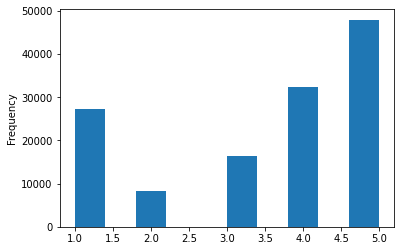

In [ ]:
df2["rating"].plot.hist() # frequencia de avaliações dos usuários por meio da quantidade de estrelas de 1 a 5. 

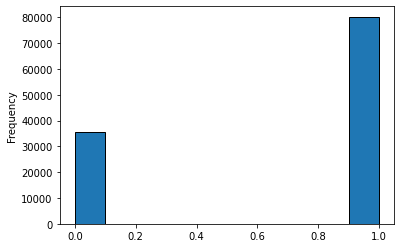

In [ ]:
df2['polarity'].plot.hist(edgecolor='black') #inserindo borda preta no histograma

In [ ]:
df2.describe() # com essas estatísticas eu posso visualizar (confirmar) que 
               # o número de avaliações positivas foi maior(75%) do que as negativas(25%) comparando com o histograma

,polarity,rating
count,116058.000000,132373.000000
mean,0.691895,3.492004
std,0.461712,1.530289
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,4.000000
75%,1.000000,5.000000
max,1.000000,5.000000


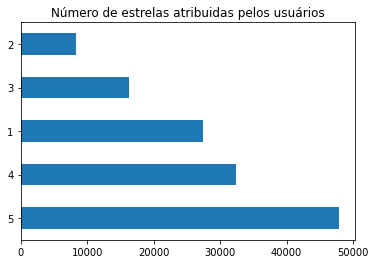

In [ ]:
df2["rating"].value_counts().plot.barh(title='Número de estrelas atribuidas pelos usuários')

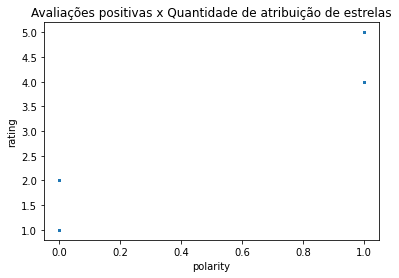

In [ ]:
# não é o gráfico mais adequado para a análise
df2.plot.scatter(x='polarity', y='rating', s=.5, title='Avaliações positivas x Quantidade de atribuição de estrelas')

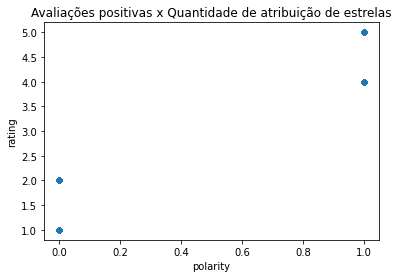

In [ ]:
df2.sample(frac=.1).plot.scatter(x='polarity', y='rating', title='Avaliações positivas x Quantidade de atribuição de estrelas')
#conforme aumenta a quantidade de estrelas, aumenta a polaridade positiva (1)

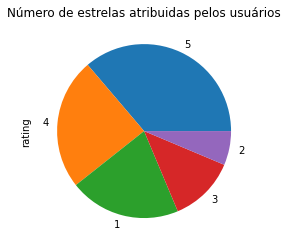

In [ ]:
# contando os valores e plotando através do gráfico de pizza 
df["rating"].value_counts().plot.pie(title = 'Número de estrelas atribuidas pelos usuários')

Link para o Dataset utilizado nesta análise: https://www.kaggle.com/fredericods/ptbr-sentiment-analysis-datasets